In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

In [3]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print(df.info())
print(df.describe())
print(df['price_range'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

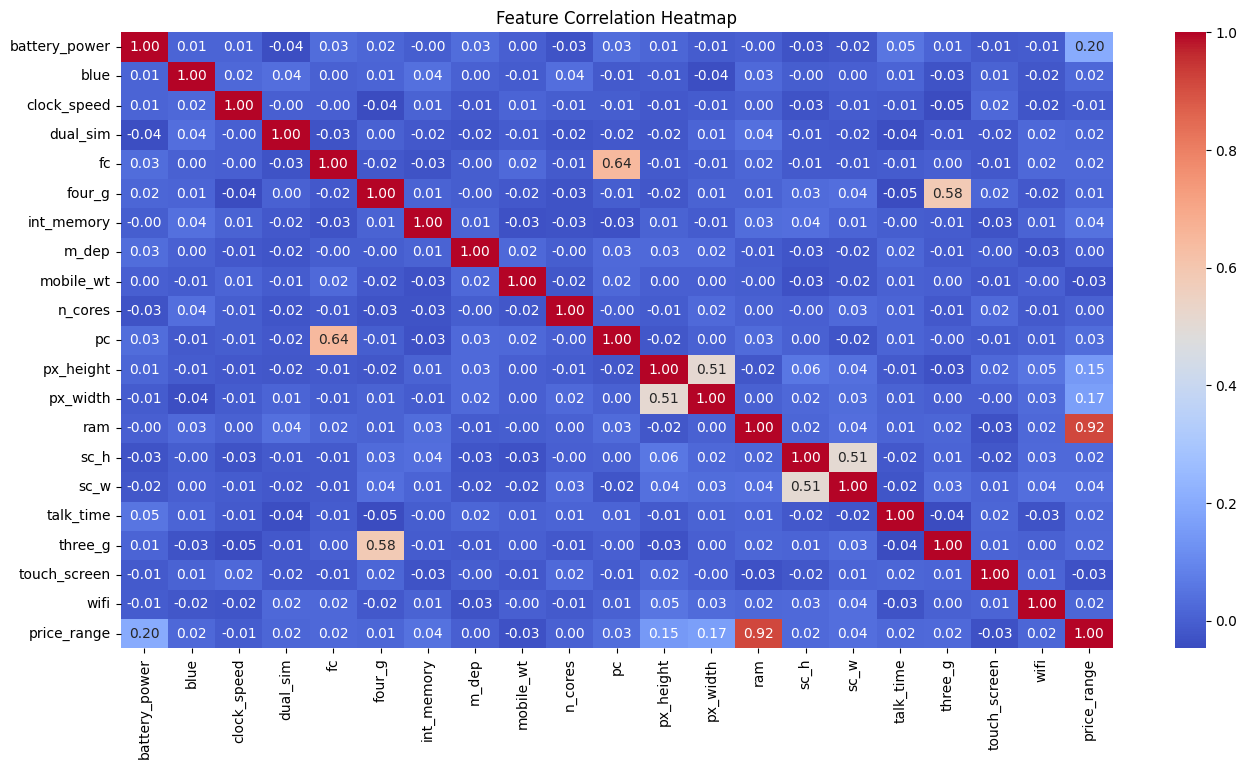

In [5]:
# Using HeatMap to visualize the correlation between features
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

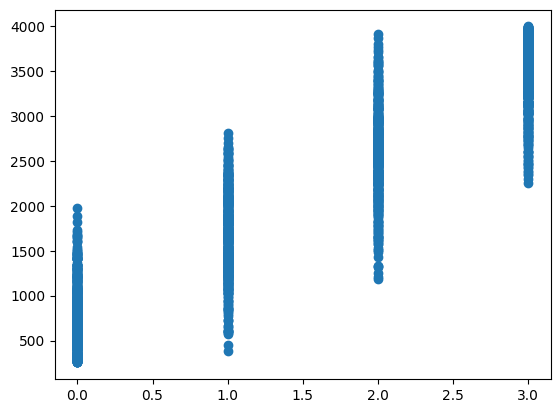

In [6]:
# to check if data is linear or not
plt.scatter(df['price_range'],df['ram'])


<Axes: xlabel='price_range', ylabel='ram'>

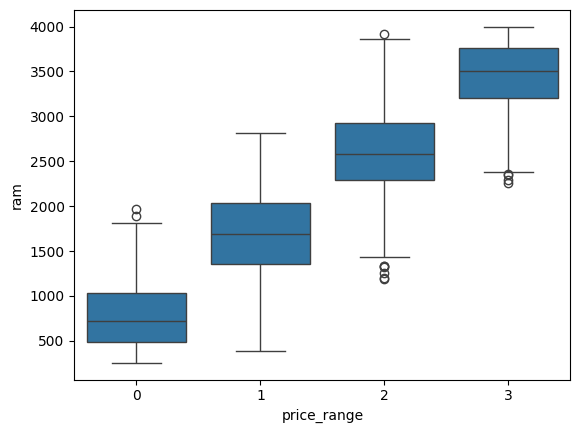

In [7]:
sns.boxplot(x='price_range', y='ram', data=df)

###  🔍 We use these two plots to determine whether the data exhibits a **linear** or **non-linear relationship**. This understanding would helps us to select the most appropriate **models** for **training and testing**.

In [8]:
# Additional features engineering for better model performance
df['resolution'] = df['px_height'] * df['px_width']
df['total_camera_mp'] = df['fc'] + df['pc']
df['battery_per_ram'] = df['battery_power'] / df['ram']
df['memory_ram_ratio'] = df['int_memory'] / df['ram']
df['core_speed'] = df['n_cores'] * df['clock_speed']
df['connectivity_count'] = df['blue'] + df['three_g'] + df['four_g'] + df['wifi']
df['talk_time_per_battery'] = df['talk_time'] / df['battery_power']


print(df[['resolution', 'total_camera_mp', 'battery_per_ram', 'memory_ram_ratio', 'core_speed', 'connectivity_count', 'talk_time_per_battery']].head())

   resolution  total_camera_mp  battery_per_ram  memory_ram_ratio  core_speed  \
0       15120                3         0.330326          0.002746         4.4   
1     1799140                6         0.388065          0.020144         1.5   
2     2167308                8         0.216289          0.015751         2.5   
3     2171776                9         0.222102          0.003611        15.0   
4     1464096               27         1.290574          0.031184         2.4   

   connectivity_count  talk_time_per_battery  
0                   1               0.022565  
1                   3               0.006856  
2                   3               0.015986  
3                   2               0.017886  
4                   3               0.008237  


In [9]:
X = df.drop('price_range', axis=1)
y = df['price_range']
print(X.columns)
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, '../models/scaler.pkl')

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'resolution', 'total_camera_mp',
       'battery_per_ram', 'memory_ram_ratio', 'core_speed',
       'connectivity_count', 'talk_time_per_battery'],
      dtype='object')
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


['../models/scaler.pkl']

In [10]:
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "SGD Classifier": make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)),
    "LDA":LinearDiscriminantAnalysis(), 
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6),
    "SVM": make_pipeline(StandardScaler(), SVC(probability=True)),
    "KNN": KNeighborsClassifier(),
    "Gaussian": GaussianNB() 
}


## 📊 Model Selection Based on Data Type

### 🔷 **Linear Model**

- **Logistic Regression**    
  *Why:* Logistic Regression is a linear model that performs well for classification tasks when the relationship between features and the target variable is linear. Since our target variable (`price_range`) is categorical (0, 1, 2, 3), and visualizations suggest a linear relationship, Logistic Regression is a strong and reliable choice for this dataset.

- **SGD Classifier**    
  *Why:* The SGD Classifier with log_loss functions similarly to logistic regression but is optimized for large-scale datasets using stochastic gradient descent. It’s fast and efficient, especially when dealing with many features or samples, and can handle linear classification tasks well.

- **Linear Discriminant Analysis (LDA)**    
  *Why:* LDA assumes that each class follows a Gaussian distribution and finds a linear combination of features that best separate the classes. If the dataset meets these assumptions (or approximately so), LDA can be very effective at classifying multi-class targets like price ranges.



---

### 🔶 **Non-Linear Models**

We also explored several non-linear models to better understand the nature of our dataset and evaluate whether models that uses non-linear relationships might offer improved performance.

- **Random Forest**  
  *Why:* This ensemble method based on decision trees is capable of capturing **non-linear feature interactions**. It is robust and performs effectively across various data types.

- **Support Vector Machine (SVM)**  
  *Why:* When using non-linear kernels like SVM can model **complex, non-linear decision boundaries**. It performs particularly well on medium-sized datasets and benefits significantly from feature scaling.

- **XGBoost**  
  *Why:* A high-performance gradient boosting framework, XGBoost is excellent at capturing **non-linear interactions** and is highly effective for structured data problems.

---

### ⚙️ **Other Non-Linear Models (Less Effective in This Case)**

- **K-Nearest Neighbors (KNN)**  
- **Gaussian Naive Bayes**

  *Note:* These models showed relatively **low accuracy** on our dataset. Their poor performance, in combination with data visualization insights, suggests that the dataset is more **linear in nature**. Therefore, models like Logistic Regression are more appropriate for achieving higher predictive performance.



📊 Logistic Regression
Accuracy: 0.9725
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.94      0.97      0.95        91
           2       1.00      0.96      0.98        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



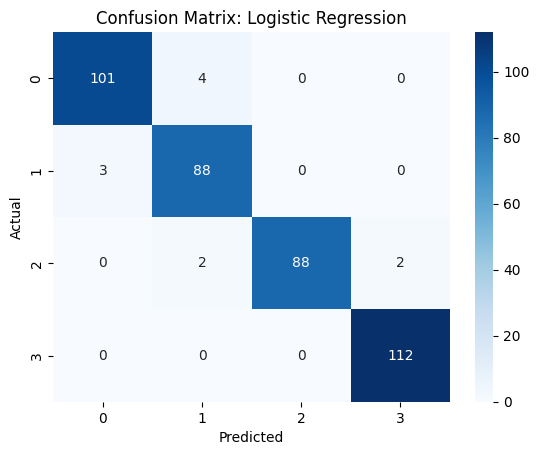


📊 SGD Classifier
Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.69      0.73      0.71        91
           2       0.70      0.68      0.69        92
           3       0.98      0.98      0.98       112

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



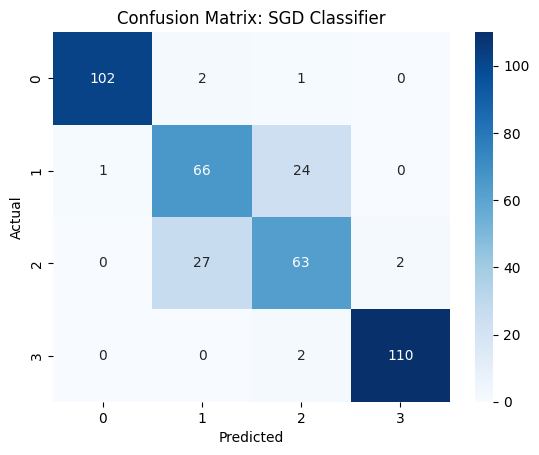


📊 LDA
Accuracy: 0.9250
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       105
           1       0.87      0.96      0.91        91
           2       0.87      0.90      0.89        92
           3       0.96      0.92      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.93      0.93      0.93       400



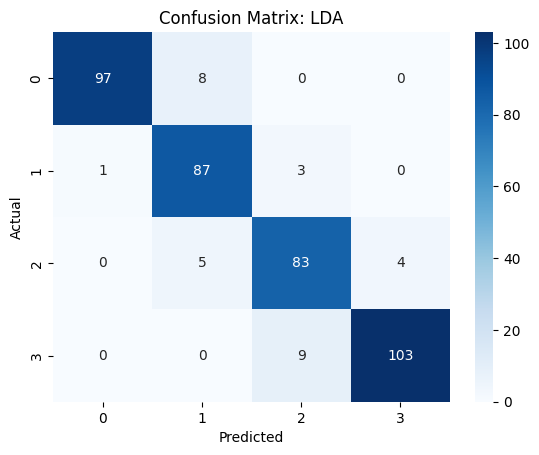


📊 Random Forest
Accuracy: 0.8925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       105
           1       0.86      0.88      0.87        91
           2       0.81      0.88      0.84        92
           3       0.94      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



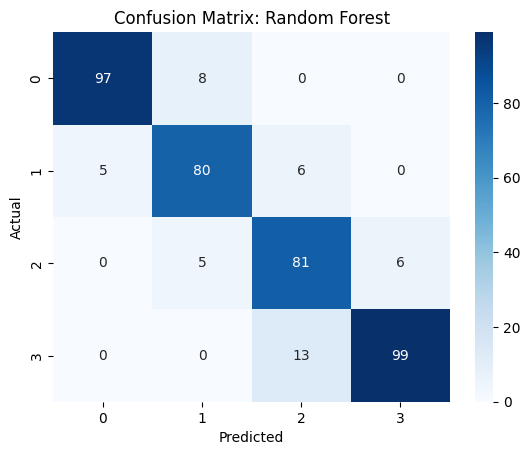


📊 XGBoost
Accuracy: 0.9050
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       105
           1       0.84      0.96      0.90        91
           2       0.86      0.84      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



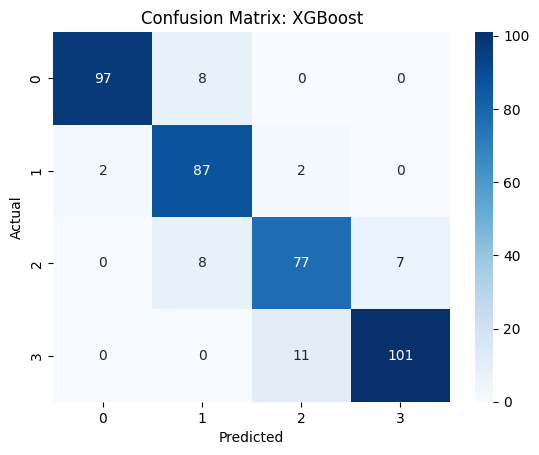


📊 SVM
Accuracy: 0.8775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92       105
           1       0.77      0.89      0.83        91
           2       0.80      0.84      0.82        92
           3       0.96      0.90      0.93       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



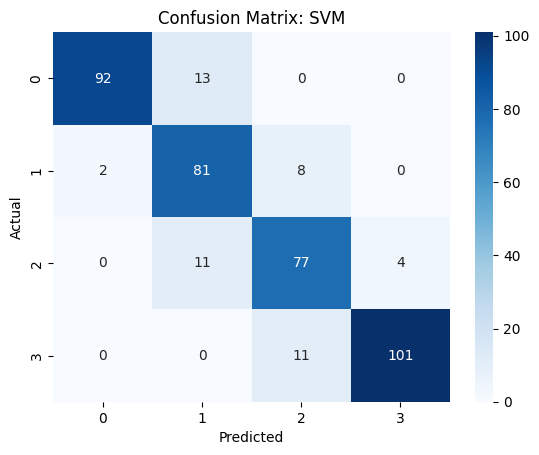


📊 KNN
Accuracy: 0.5500
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75       105
           1       0.34      0.45      0.39        91
           2       0.37      0.43      0.40        92
           3       0.85      0.55      0.67       112

    accuracy                           0.55       400
   macro avg       0.58      0.54      0.55       400
weighted avg       0.60      0.55      0.57       400



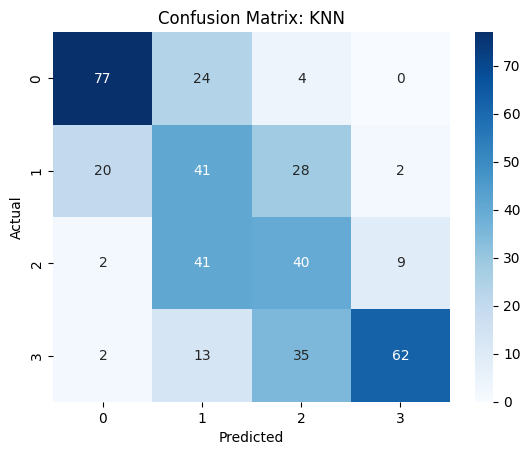


📊 Gaussian
Accuracy: 0.7350
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82       105
           1       0.63      0.60      0.62        91
           2       0.57      0.77      0.65        92
           3       0.86      0.81      0.83       112

    accuracy                           0.73       400
   macro avg       0.75      0.73      0.73       400
weighted avg       0.76      0.73      0.74       400



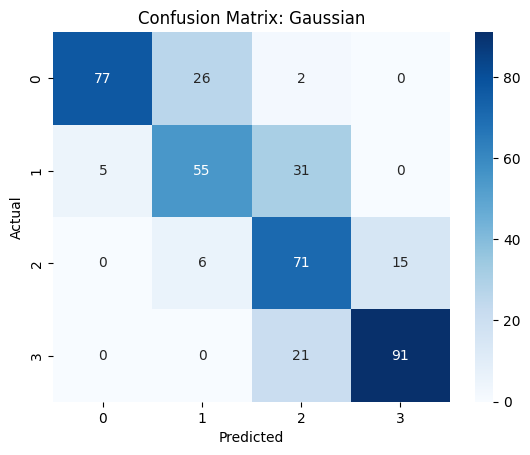

In [11]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)          
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📊 {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [12]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)          
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n📊 {name}")
    print(f"Accuracy: {acc:.4f}")


📊 Logistic Regression
Accuracy: 0.9725

📊 SGD Classifier
Accuracy: 0.8525

📊 LDA
Accuracy: 0.9250

📊 Random Forest
Accuracy: 0.8925

📊 XGBoost
Accuracy: 0.9050

📊 SVM
Accuracy: 0.8775

📊 KNN
Accuracy: 0.5500

📊 Gaussian
Accuracy: 0.7350


## ✅ Model Performance Summary and Final Selection

1. After training and evaluating six different machine learning models on our mobile price prediction dataset, only **three models** — **Logistic Regression**, **Linear Discriminant Analysis (LDA)** and **XGBoost** — achieved accuracy scores above **90%** on the test data.

2. Among these, **Logistic Regression** delivered the **best performance**, achieving a test accuracy of **97.25%**, while **Linear Discriminant Analysis (LDA)** and **XGBoost** followed closely behind. Other models like Random Forest, SVM, KNN, and Gaussian Naive Bayes showed lower accuracy, particularly on the test set, indicating less generalizability.

3. The **classification report** of Logistic Regression on the test set also demonstrated strong **precision, recall, and F1-scores** across all four target categories (`0`: very low, `1`: low, `2`: medium, `3`: high), confirming its robustness and suitability for our task.

4. Based on this comprehensive performance evaluation, we have selected **Logistic Regression** as the **final model** for predicting mobile phone price ranges.


In [13]:
best_model = models["Logistic Regression"]  # Select the specific model
joblib.dump(best_model, '../models/best_model.pkl')  # Save only Logistic Regression
print("Logistic Regression model saved as best_model.pkl")


Logistic Regression model saved as best_model.pkl


In [16]:
# Testing Number 1

new_data = pd.DataFrame({
    'battery_power': [1200],
    'blue': [1],
    'clock_speed': [2.5],
    'dual_sim': [1],
    'fc': [8],
    'four_g': [1],
    'int_memory': [24],
    'm_dep': [0.7],
    'mobile_wt': [140],
    'n_cores': [4],
    'pc': [12],
    'px_height': [100],
    'px_width': [800],
    'ram': [4082],
    'sc_h': [12],
    'sc_w': [6],
    'talk_time': [10],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]
})

new_data['resolution'] = new_data['px_height'] * new_data['px_width']
new_data['total_camera_mp'] = new_data['fc'] + new_data['pc']
new_data['battery_per_ram'] = new_data['battery_power'] / new_data['ram']
new_data['memory_ram_ratio'] = new_data['int_memory'] / new_data['ram']
new_data['core_speed'] = new_data['n_cores'] * new_data['clock_speed']
new_data['connectivity_count'] = new_data['blue'] + new_data['three_g'] + new_data['four_g'] + new_data['wifi']
new_data['talk_time_per_battery'] = new_data['talk_time'] / new_data['battery_power']

price_labels = {
    0: "low cost",
    1: "medium cost",
    2: "high cost",
    3: "very high cost"
}

scaler = joblib.load('../models/scaler.pkl')
new_data_scaled = scaler.transform(new_data)

loaded_model = joblib.load('../models/best_model.pkl')
predict = loaded_model.predict(new_data.values)
print("Predicted Price Range:",predict, price_labels[predict[0]])


Predicted Price Range: [3] very high cost


In [17]:
# Testing Number 2

new_data = pd.DataFrame({
    'battery_power': [1200],
    'blue': [1],
    'clock_speed': [2.5],
    'dual_sim': [1],
    'fc': [8],
    'four_g': [1],
    'int_memory': [24],
    'm_dep': [0.7],
    'mobile_wt': [100],
    'n_cores': [4],
    'pc': [12],
    'px_height': [100],
    'px_width': [300],
    'ram': [120],
    'sc_h': [12],
    'sc_w': [6],
    'talk_time': [10],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]
})

new_data['resolution'] = new_data['px_height'] * new_data['px_width']
new_data['total_camera_mp'] = new_data['fc'] + new_data['pc']
new_data['battery_per_ram'] = new_data['battery_power'] / new_data['ram']
new_data['memory_ram_ratio'] = new_data['int_memory'] / new_data['ram']
new_data['core_speed'] = new_data['n_cores'] * new_data['clock_speed']
new_data['connectivity_count'] = new_data['blue'] + new_data['three_g'] + new_data['four_g'] + new_data['wifi']
new_data['talk_time_per_battery'] = new_data['talk_time'] / new_data['battery_power']


price_labels = {
    0: "low cost",
    1: "medium cost",
    2: "high cost",
    3: "very high cost"
}

scaler = joblib.load('../models/scaler.pkl')
new_data_scaled = scaler.transform(new_data)

loaded_model = joblib.load('../models/best_model.pkl')
predict = loaded_model.predict(new_data.values)
print("Predicted Price Range:", predict ,price_labels[predict[0]])


Predicted Price Range: [2] high cost
